In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sa
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

In [18]:
data = pd.read_csv('AirPassengers.csv')
data.rename(columns={'Month': 'month','#Passengers': 'passengers'}, inplace=True)
data

,month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


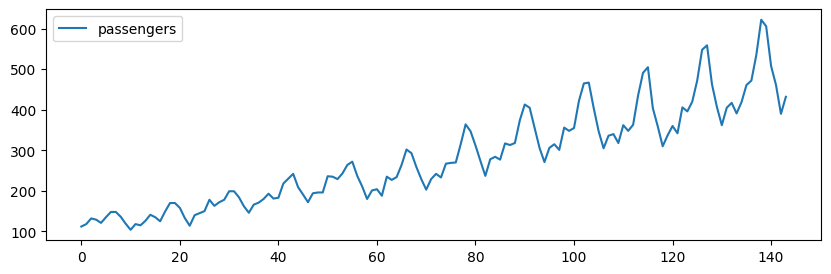

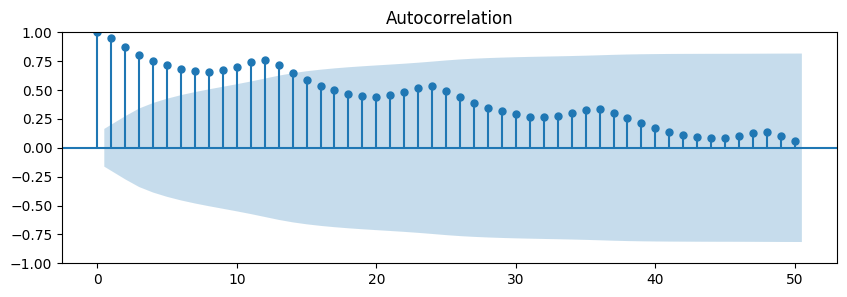

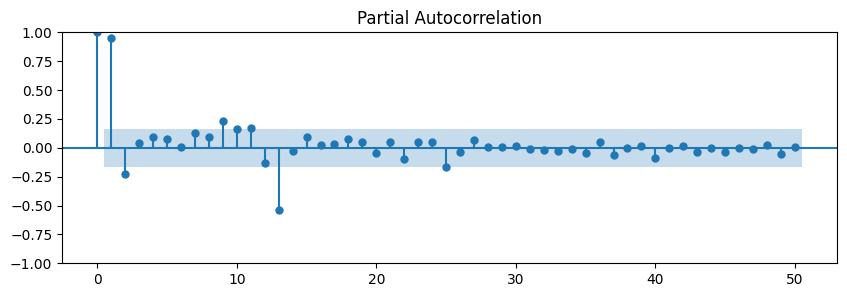

In [21]:
# Візуалізуємо графік і відображаємо кореляції
matplotlib.rcParams['figure.figsize'] = [10, 3]
data.plot()
pyplot.show()

plot_acf(data.passengers, lags=50)
plt.show()

plot_pacf(data.passengers, method='ywm', lags=50)
plt.show()

In [58]:
# Визначення оптимальної моделі

train = data.iloc[:-24]
test = data.iloc[-24:]

model_to_select = auto_arima(train.passengers, seasonal=True,
                   stepwise=False, trace=True, m=12)
print(model_to_select.summary())

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=910.236, Time=0.01 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=912.235, Time=0.12 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=914.228, Time=0.17 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=912.235, Time=0.16 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=914.235, Time=0.25 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=916.229, Time=0.68 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=914.224, Time=0.49 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=916.133, Time=1.05 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=859.115, Time=0.06 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=860.575, Time=0.20 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=862.422, Time=0.55 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=860.629, Time=0.24 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=862.453, Time=0.57 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=864.421, Time=0.67 sec
 ARIMA(0,0,1)(

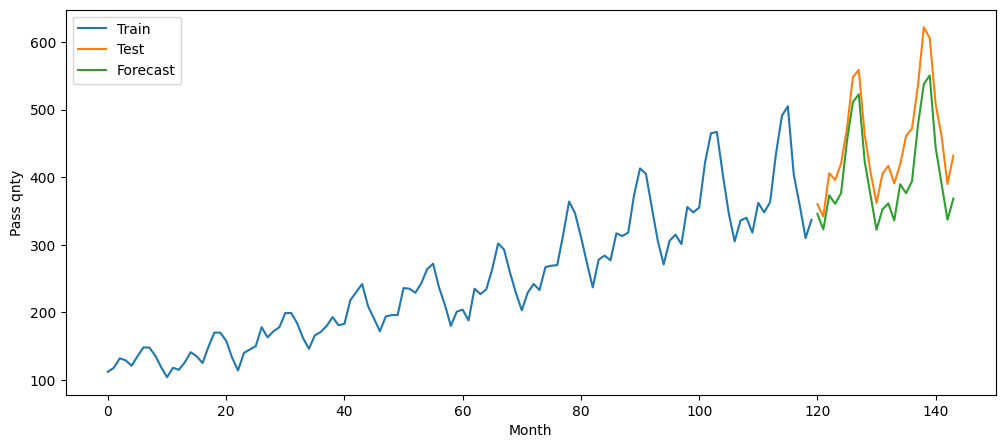

In [59]:
# Best model:  ARIMA(2,0,0)(1,1,2)[12]

# Прогнозуємо дані
model = ARIMA(train['passengers'], order=(2,0,0), seasonal_order=(1,1,2,12)).fit()
forecast = model.forecast(len(test), alpha=0.05)

plt.figure(figsize=(12,5))
sns.lineplot(train.passengers, label='Train')
sns.lineplot(test.passengers, label='Test')
sns.lineplot(x= test.index, y=forecast, label='Forecast')
plt.xlabel('Month')
plt.ylabel('Pass qnty')
plt.legend()
plt.show()

In [63]:
# Метрики  тренувальної частини

mae_train = mean_absolute_error(train['passengers'], model.fittedvalues)
rmse_train = np.sqrt(mean_squared_error(train['passengers'], model.fittedvalues))
mape_train = mean_absolute_percentage_error(train['passengers'], model.fittedvalues)

print(f'MAE train: {mae_train: .2f}\n'
      f'RMSE train: {rmse_train: .2f}\n'
      f'MAPE train:{mape_train: .2f}')

MAE train:  19.11
RMSE train:  41.14
MAPE train: 0.13


In [65]:
# Метрики тестувальної частини

mae_test = mean_absolute_error(test['passengers'], forecast)
rmse_test = np.sqrt(mean_squared_error(test['passengers'], forecast))
mape_test = mean_absolute_percentage_error(test['passengers'], forecast)

print(f'MAE test: {mae_test: .2f}\n'
      f'RMSE test: {rmse_test: .2f}\n'
      f'MAPE test:{mape_test: .2f}')

MAE test:  48.14
RMSE test:  51.90
MAPE test: 0.11


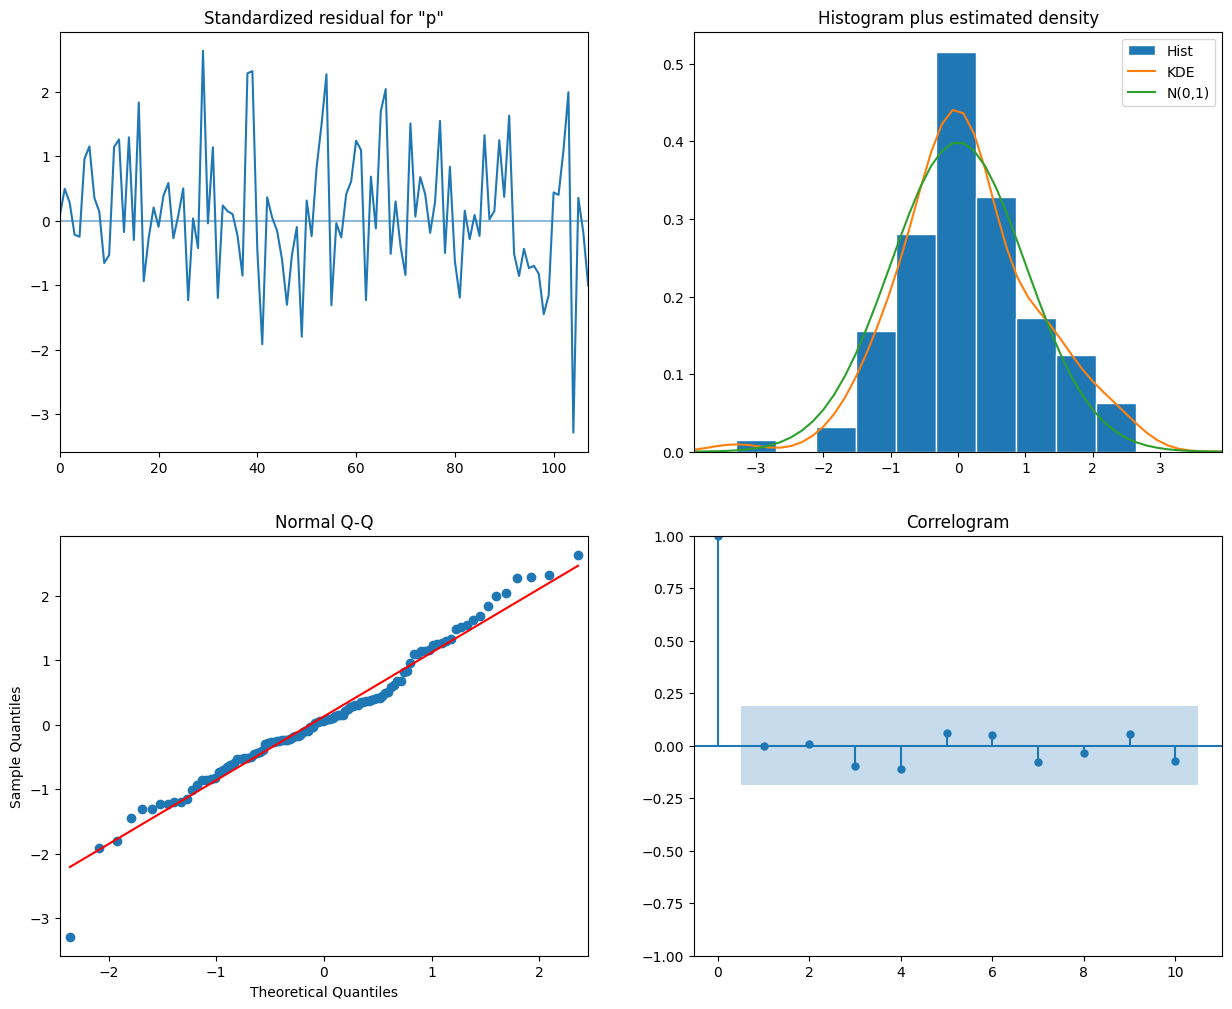

In [29]:
# Діагностика моделі
fig = model.plot_diagnostics(figsize=(15,12))

In [31]:
# Модель SARIMAX

train = data.iloc[:-24]
test = data.iloc[-24:]

model_sarimax = sa.tsa.statespace.SARIMAX(train['passengers'], seasonal_order=(1,1,2,12)).fit()

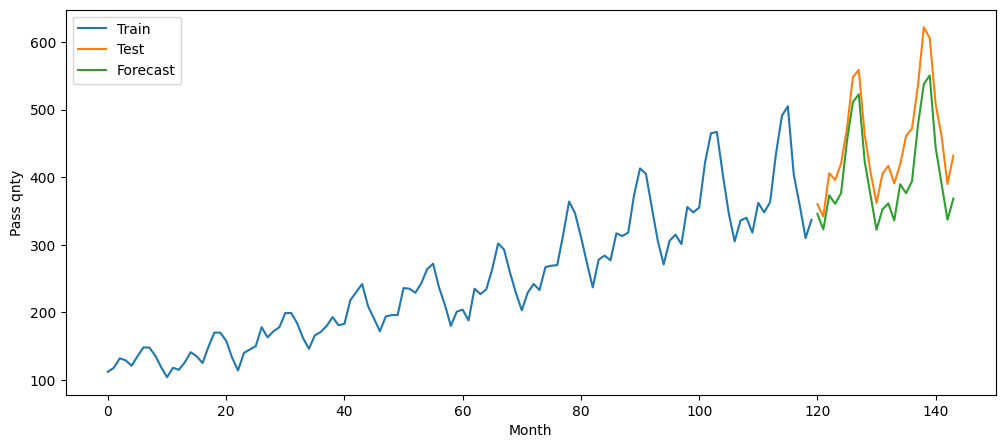

In [33]:
# Прогнозуємо дані

forecast_2 = model_sarimax.forecast(len(test), alpha=0.05)
plt.figure(figsize=(12,5))
sns.lineplot(train.passengers, label='Train')
sns.lineplot(test.passengers, label='Test')
sns.lineplot(x= test.index, y=forecast, label='Forecast')
plt.xlabel('Month')
plt.ylabel('Pass qnty')
plt.legend()
plt.show()

In [68]:
# Метрики тренувальної частини

mae_train = mean_absolute_error(train['passengers'], model_sarimax.fittedvalues)
rmse_train = np.sqrt(mean_squared_error(train['passengers'], model_sarimax.fittedvalues))
mape_train = mean_absolute_percentage_error(train['passengers'], model_sarimax.fittedvalues)

print(f'MAE train: {mae_train: .2f}\n'
      f'RMSE train: {rmse_train: .2f}\n'
      f'MAPE train:{mape_train: .2f}')

MAE train:  19.63
RMSE train:  41.24
MAPE train: 0.13


In [67]:
# Метрики тестувальної частини

mae_test = mean_absolute_error(test['passengers'], forecast_2)
rmse_test = np.sqrt(mean_squared_error(test['passengers'], forecast_2))
mape_test = mean_absolute_percentage_error(test['passengers'], forecast_2)

print(f'MAE test: {mae_test: .2f}\n'
      f'RMSE test: {rmse_test: .2f}\n'
      f'MAPE test:{mape_test: .2f}')

MAE test:  48.44
RMSE test:  52.08
MAPE test: 0.11


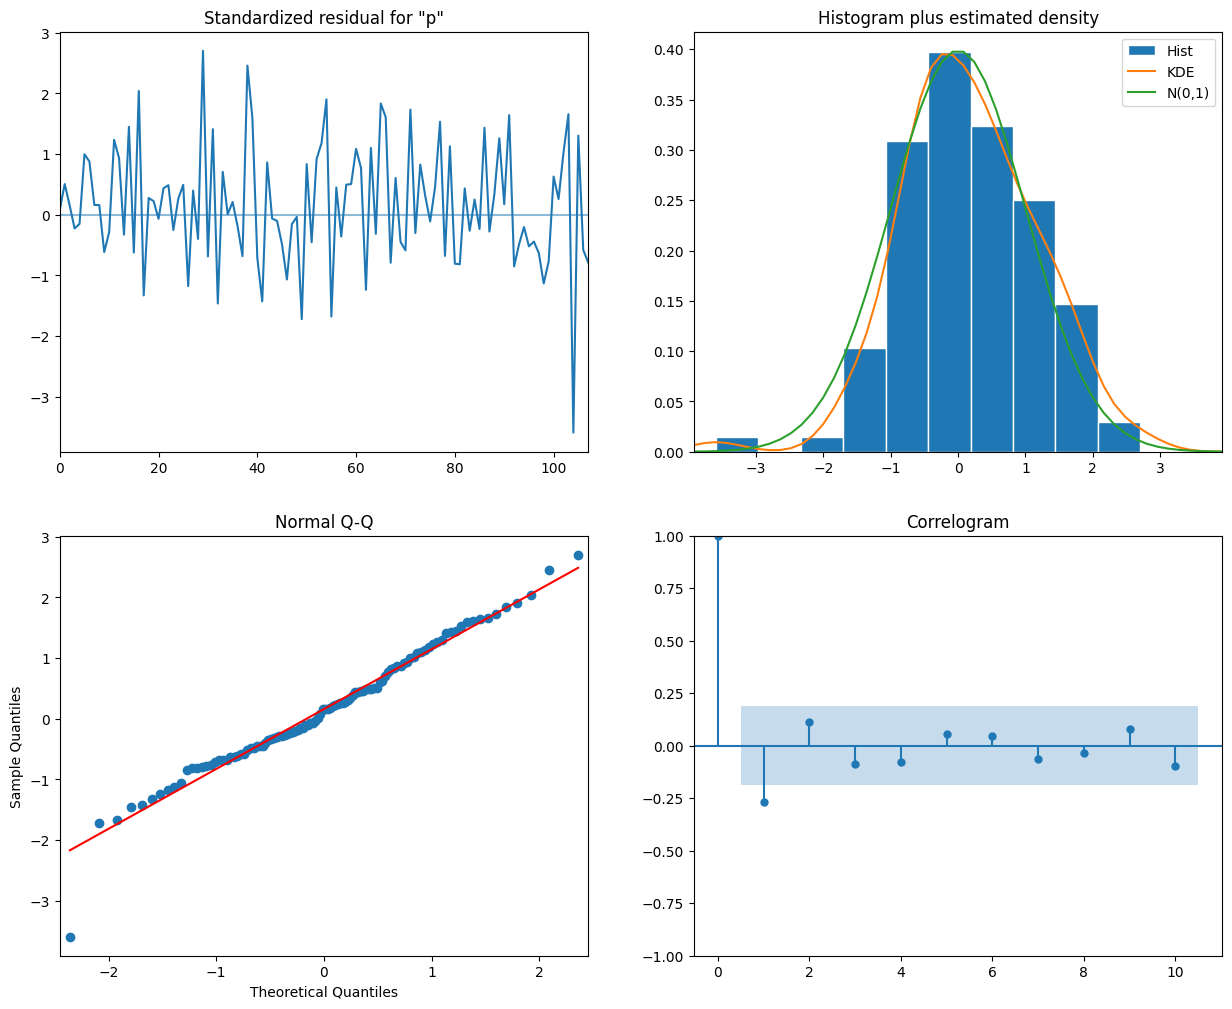

In [36]:
fig = model_sarimax.plot_diagnostics(figsize=(15,12))

#### Прогнозування через моделі Arima i Sarimax

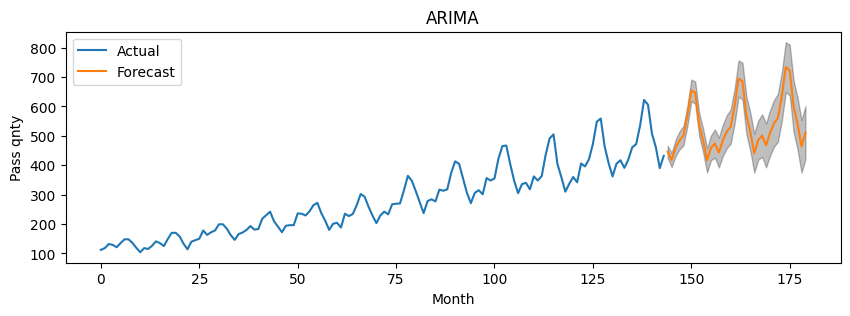

In [39]:
model_arima = ARIMA(data['passengers'], order=(2,0,0), seasonal_order=(1,1,2,12)).fit()
pred_uc = model_arima.get_forecast(steps=12*3)
pred_ci = pred_uc.conf_int()
ax = data['passengers'].plot(label='Actual')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Month')
ax.set_ylabel('Pass qnty')
plt.title('ARIMA')
plt.legend()
plt.show()

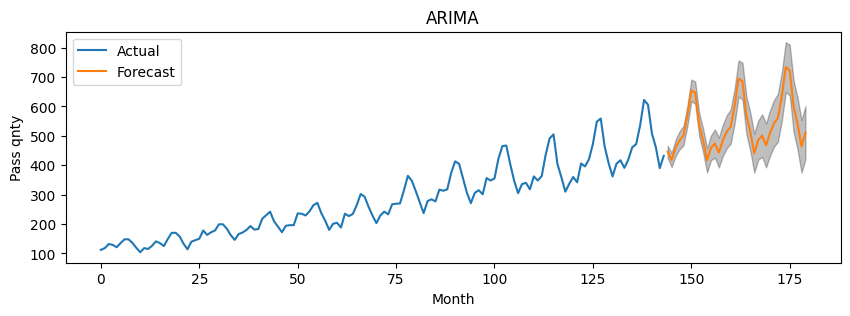

In [40]:
model_saarimax = ARIMA(data['passengers'], order=(2,0,0), seasonal_order=(1,1,2,12)).fit()
pred_uc = model_arima.get_forecast(steps=12*3)
pred_ci = pred_uc.conf_int()
ax = data['passengers'].plot(label='Actual')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Month')
ax.set_ylabel('Pass qnty')
plt.title('ARIMA')
plt.legend()
plt.show()

In [42]:
# Наступний датасет
temp = pd.read_csv('temperature.csv')
temp.rename(columns={'Date': 'date', 'Temp': 'temp'}, inplace=True)
temp

,date,temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


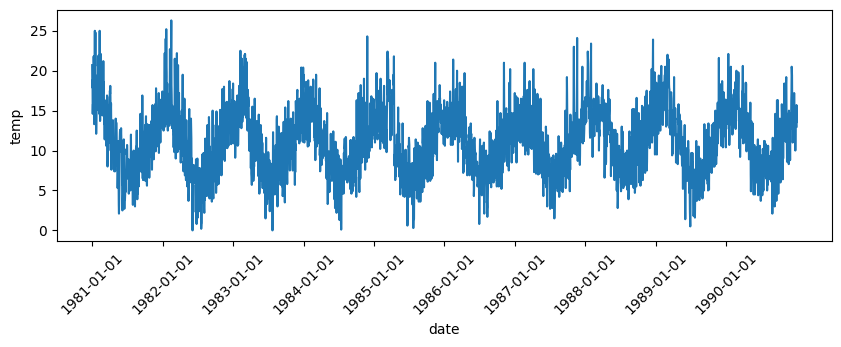

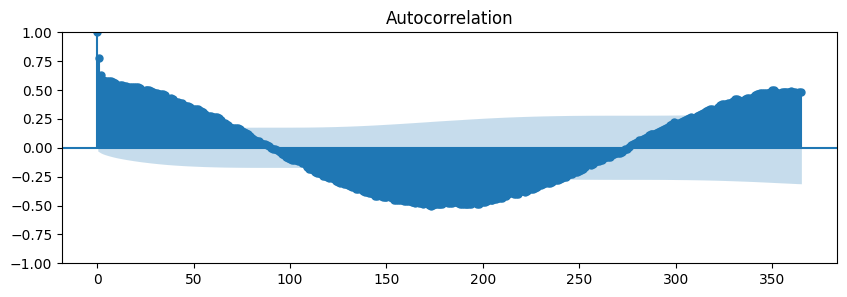

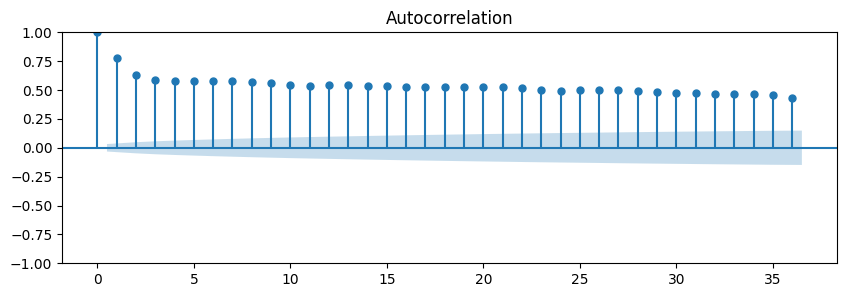

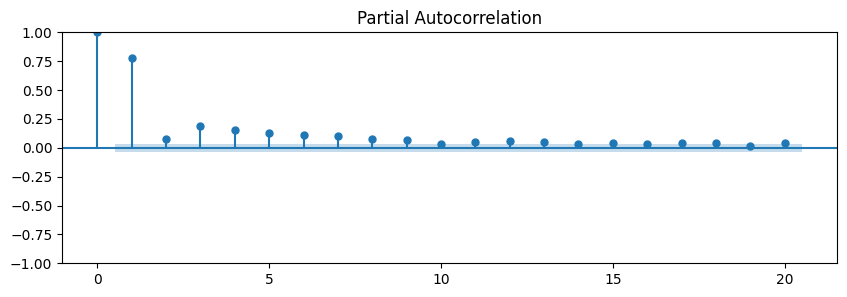

In [43]:
# візуазізуємо дані
sns.lineplot(data=temp, x='date', y='temp')
plt.xticks(temp.date[::365], rotation=45)
plt.show()

plot_acf(temp.temp, lags=365)
plt.show()

matplotlib.rcParams['figure.figsize'] = [10, 3]
plot_acf(temp.temp)
pyplot.show()

plot_pacf(temp.temp, lags = 20)
pyplot.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   temp   No. Observations:                 2920
Model:                          ARIMA   Log Likelihood               -8234.696
Date:                Sat, 18 Mar 2023   AIC                          16473.391
Time:                        11:58:23   BIC                          16485.350
Sample:                             0   HQIC                         16477.699
                               - 2920                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1057      0.076    146.442      0.000      10.957      11.254
sigma2        16.4829      0.430     38.335      0.000      15.640      17.326
===================================================================================
Ljung-Box (L1) (Q):                1701.04   Jarque-Bera (JB):                18.79
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

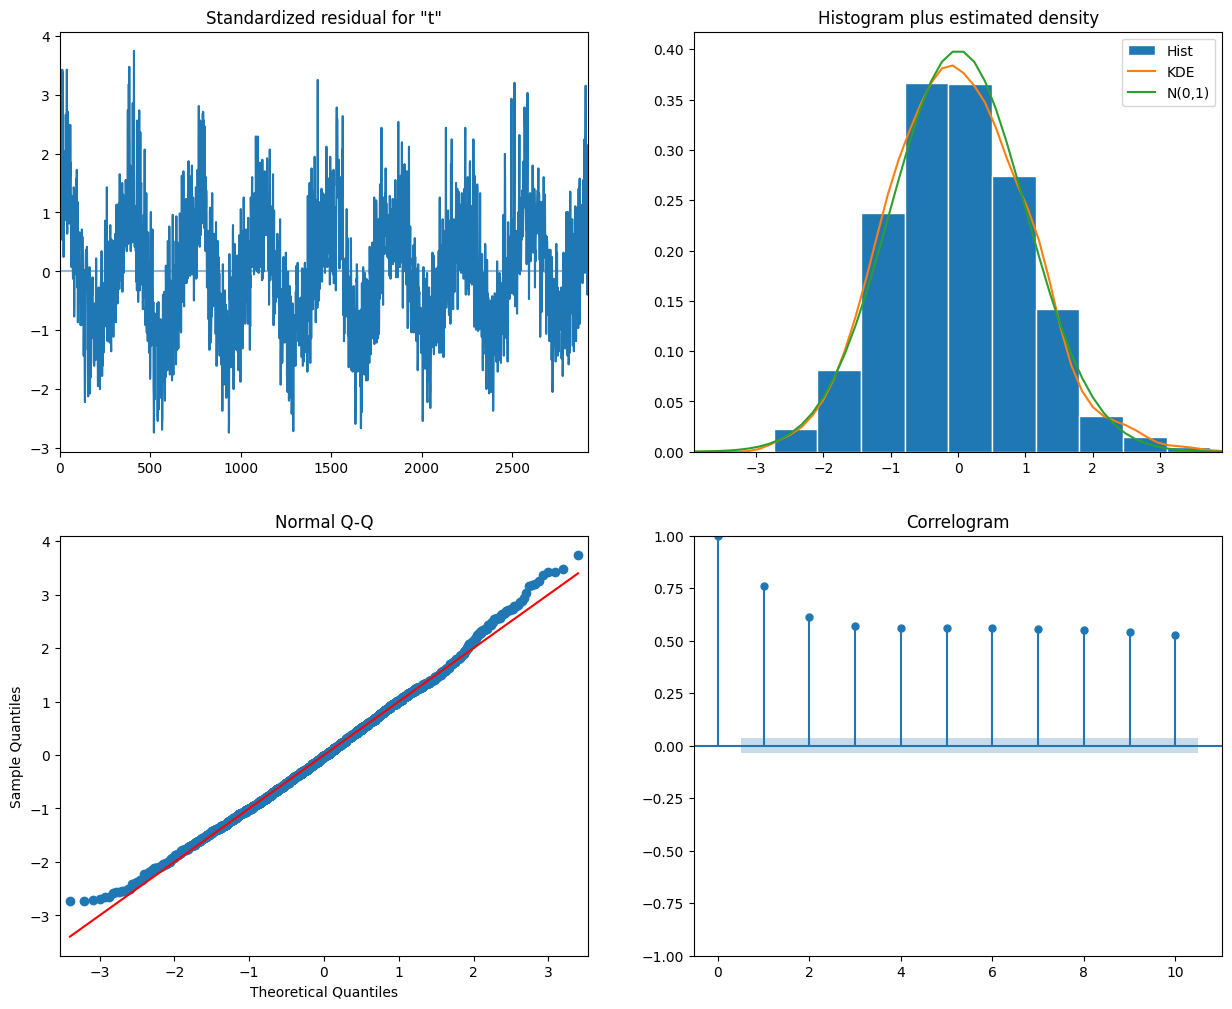

In [45]:
src_data_model = temp.temp[:2920]
model = sa.tsa.ARIMA(src_data_model).fit()
fig = model.plot_diagnostics(figsize=(15,12))
model.summary()

<AxesSubplot: >

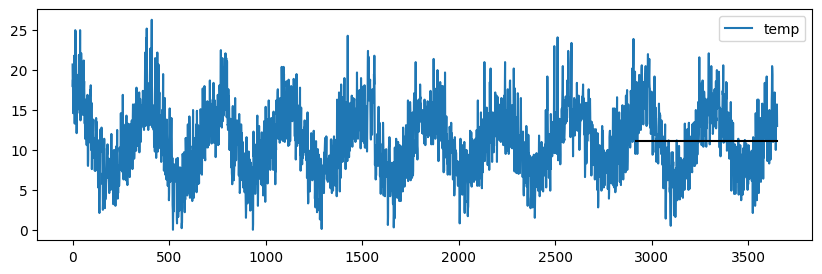

In [51]:
# робимо прогноз
forecast_n = model.predict(2920,3649, typ='levels')
temp.plot()
forecast_n.plot(style='black')

In [52]:
comp = temp.temp[2919:3649]

In [70]:
mae_test_n = mean_absolute_error(comp, forecast_n)
rmse_test_n = np.sqrt(mean_squared_error(comp, forecast_n))
mape_test_n = mean_absolute_percentage_error(comp, forecast_n)

print(f'MAE test: {mae_test_n: .2f}\n'
      f'RMSE test: {rmse_test_n: .2f}\n'
      f'MAPE test:{mape_test_n: .2f}')

MAE test:  3.41
RMSE test:  4.14
MAPE test: 0.44


<AxesSubplot: >

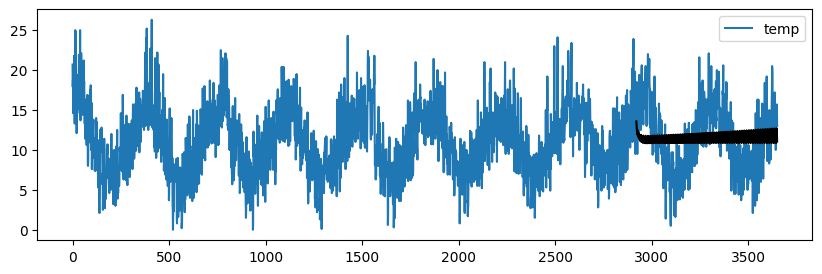

In [71]:
model = sa.tsa.statespace.SARIMAX(src_data_model, seasonal_order=(2,2,2,12)).fit()
forecast_n = model.predict(2920,3649, typ='levels')
temp.plot()
forecast_n.plot(style='black')

In [72]:
mae_test_n = mean_absolute_error(comp, forecast_n)
rmse_test_n = np.sqrt(mean_squared_error(comp, forecast_n))
mape_test_n = mean_absolute_percentage_error(comp, forecast_n)

print(f'MAE test: {mae_test_n: .2f}\n'
      f'RMSE test: {rmse_test_n: .2f}\n'
      f'MAPE test:{mape_test_n: .2f}')

MAE test:  3.41
RMSE test:  4.14
MAPE test: 0.44
